<a href="https://colab.research.google.com/github/himanshuchoudhary94/OCR-Translate-TTS/blob/master/OCR_%2B_Translate_%2B_TTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install easyocr

     |████████████████████████████████| 48.4MB 88kB/s 


In [2]:
!pip install googletrans

     |████████████████████████████████| 61kB 2.1MB/s 
     |████████████████████████████████| 942kB 7.6MB/s 
     |████████████████████████████████| 51kB 2.9MB/s 
     |████████████████████████████████| 71kB 6.0MB/s 
     |████████████████████████████████| 61kB 5.2MB/s 
     |████████████████████████████████| 102kB 6.9MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=bd537ea17c40542461ff42531d11e5b6c0ba627e03f33b72b4bc2c96e2065883
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=cde3aa06aed462c22e541b457dd1b5825d0d94ae7efc3303d6e3eea21793674f
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [3]:
!pip install gTTS

  Created wheel for gtts-token: filename=gTTS_token-1.1.3-cp36-none-any.whl size=4097 sha256=482da8775711a05a5d9a12eeeea439dff76a63c666034eeb080225c78f6cc679
  Stored in directory: /root/.cache/pip/wheels/dd/11/61/33f7e51bf545e910552b2255eead2a7cd8ef54064b46dceb34
Successfully built gtts-token


In [4]:
!wget https://i.stack.imgur.com/mk1jX.jpg

--2020-08-16 15:36:08--  https://i.stack.imgur.com/mk1jX.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 104.16.2.35, 104.16.30.34, 104.16.27.34, ...
Connecting to i.stack.imgur.com (i.stack.imgur.com)|104.16.2.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45178 (44K) [image/jpeg]
Saving to: ‘mk1jX.jpg’

mk1jX.jpg           100%[===================>]  44.12K  --.-KB/s    in 0s      

2020-08-16 15:36:08 (86.3 MB/s) - ‘mk1jX.jpg’ saved [45178/45178]



In [5]:
from googletrans import Translator
import easyocr
from gtts import gTTS
from IPython.display import Audio

In [6]:
reader = easyocr.Reader(['ta'])
translator = Translator()

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


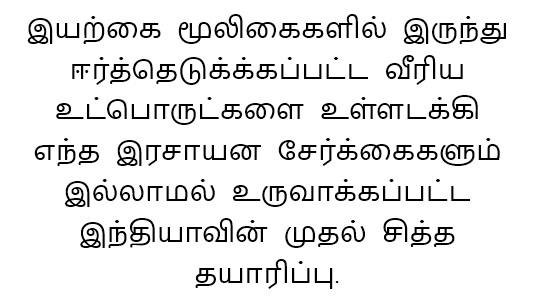

In [8]:
import PIL  #package for image processing 
from PIL import ImageDraw
im = PIL.Image.open('mk1jX.jpg')
im

In [9]:
bounds = reader.readtext('mk1jX.jpg', add_margin=0.55, width_ths=0.7, link_threshold=0.8, decoder='beamsearch', blocklist='=-')  #Reading with bounds
bounds

[([[32, 0], [532, 0], [532, 70], [32, 70]],
  'இயற்கை மூலிகைகளில் இருந்து',
  0.1882294863462448),
 ([[49, 29], [489, 29], [489, 110], [49, 110]],
  'ஈர்த்தெடுக்க்கப்பட்ட வீரிய',
  0.0326014868915081),
 ([[38, 77], [324, 77], [324, 146], [38, 146]],
  'உட்பொருட்களை ',
  0.18306025862693787),
 ([[304, 78], [496, 78], [496, 140], [304, 140]],
  'உள்ளடக்கி',
  0.4530618488788605),
 ([[14, 118], [523, 118], [523, 188], [14, 188]],
  'எந்த இரசாயன சேர்க்கைகளும்',
  0.05448511987924576),
 ([[71, 156], [491, 156], [491, 229], [71, 229]],
  'இல்லாமல் உருவாக்கப்பட்ட',
  0.6472392678260803),
 ([[60, 195], [478, 195], [478, 272], [60, 272]],
  'இந்தியாவின் முதல் சித்த',
  0.42970988154411316),
 ([[174, 237], [359, 237], [359, 303], [174, 303]],
  'தயாரிப்பு',
  0.15375211834907532)]

In [12]:
text_list = reader.readtext('mk1jX.jpg', add_margin=0.55, width_ths=0.7, link_threshold=0.8, decoder='beamsearch', blocklist='=-', detail=0) #Reading without bounds
text_list

['இயற்கை மூலிகைகளில் இருந்து',
 'ஈர்த்தெடுக்க்கப்பட்ட வீரிய',
 'உட்பொருட்களை ',
 'உள்ளடக்கி',
 'எந்த இரசாயன சேர்க்கைகளும்',
 'இல்லாமல் உருவாக்கப்பட்ட',
 'இந்தியாவின் முதல் சித்த',
 'தயாரிப்பு']

In [14]:
text_comb = ' '.join(text_list)
text_comb

'இயற்கை மூலிகைகளில் இருந்து ஈர்த்தெடுக்க்கப்பட்ட வீரிய உட்பொருட்களை  உள்ளடக்கி எந்த இரசாயன சேர்க்கைகளும் இல்லாமல் உருவாக்கப்பட்ட இந்தியாவின் முதல் சித்த தயாரிப்பு'

In [16]:
print(translator.detect(text_comb))

Detected(lang=ta, confidence=1.0)


In [18]:
text_en = translator.translate(text_comb, src='ta')
print(text_en.text)

India's first paranormal product made without any chemical additives containing active ingredients extracted from natural herbs


In [20]:
ta_tts = gTTS(text_en.text)
ta_tts.save('trans.mp3')

In [22]:
Audio('trans.mp3', autoplay=True)

In [23]:
ta_tts = gTTS(text_en.text,lang='hi')
ta_tts.save('trans.mp3')

In [24]:
Audio('trans.mp3', autoplay=True)

In [25]:
text_hi = translator.translate(text_comb, src='ta',dest ='hi')
print(text_hi.text)

प्राकृतिक जड़ी बूटियों से निकाले गए सक्रिय तत्वों से युक्त किसी भी रासायनिक योजक के बिना भारत का पहला असाधारण उत्पाद


In [28]:
ta_tts = gTTS(text_hi.text,lang='en')
ta_tts.save('trans.mp3')

In [29]:
Audio('trans.mp3', autoplay=True)